# Assignment 7

## Question 1: Generate a three-dimensional dataset with 900 examples, which correspond to two classes – the first 100 with zero mean and covariance matrix S1 = [0.5 0 0; 0 0.5 0; 0 0 0.01]. The others are organized into 8 groups of 100 examples. Each group follows a Gaussian distribution with the following covariance matrix: S2 = [1 0 0; 0 1 0; 0 0 0.01]. The averages being:

- [a 0 0]; 
- [a/2 a/2 0];
- [0 a 0];
- [-a/2 a/2 0];
- [-a 0 0];
- [-a/2 –a/2 0];
- [0 –a 0];
- [a/2 –a/2 0].

Consider a=6.

In [1]:
import numpy as np

In [12]:
# define a
a = 6

# Covariance matrix
S1 = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.01]])
S2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0.01]])

# define the means of each group
means = [
    [a, 0, 0],
    [a/2, a/2, 0],
    [0, a, 0],
    [-a/2, a/2, 0],
    [-a, 0, 0],
    [-a/2, -a/2, 0],
    [0, -a, 0],
    [a/2, -a/2, 0]]

# Data generation
X, y = [], []

# First 100 with the class 1 (or zero) has mean=0 and convariance matrix S1
X.append(np.random.multivariate_normal(mean=[0, 0, 0], cov=S1, size=100))
y.extend([0]*100)

# for other 8 groups classes
for i in range(8):
    X.append(np.random.multivariate_normal(mean=means[i], cov=S2, size=100))
    y.extend([i+1]*100)

X = np.concatenate(X, axis=0)

print(f"Shape of X: {X.shape[0]}, Shape of y: {len(y)}")

Shape of X: 900, Shape of y: 900


### a) Plot the data in 3-D and view it from multiple angles to see how the data is organized in space.

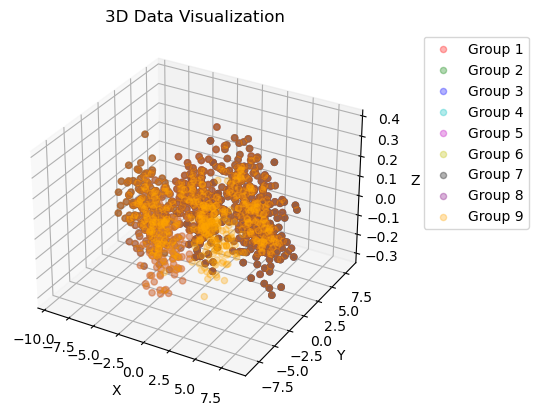

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib inline
import mplcursors

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange']
id_c = 0
for i in range(99, 900, 100):
    ax.scatter(X[:i, 0], X[:i, 1], X[:i, 2], c=colors[id_c], marker='o', label=f"Group {id_c+1}", alpha=0.3)
    id_c+=1
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Data Visualization')

ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))



### b) Apply LDA to the data. Project the data onto a subspace generated by the eigenvectors that correspond to the non-negative eigenvalues of the product of the $S_{w}^{-1}S_b$ matrices. What does that mean? Comment the results.

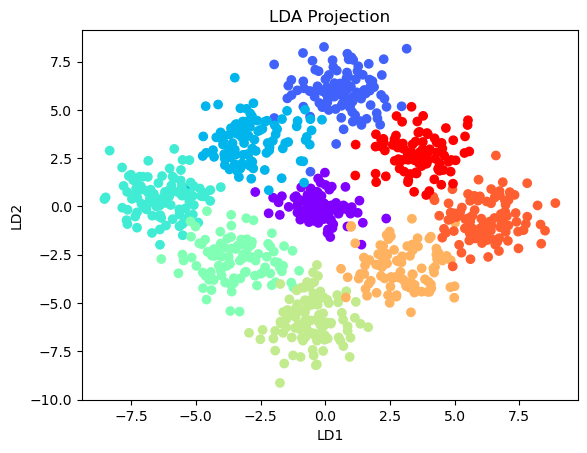

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='rainbow')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Projection')
plt.show()

In [38]:
print("Variance ratios of the LDA components:", lda.explained_variance_ratio_)

Variance ratios of the LDA components: [0.52879688 0.47080867]


The product of $S_{w}^{-1}$ (Inverse of the within-class scatter matrix) and $S_{b}$ (Between-class Scatter Matrix) - ($S_{w}^{-1}S_{b}$). The ideia is to find a linear transformation that maximizes the separation between classes while minimizing the variance within each class. The eigen vector of this product matrix provide directions in the original feature space that optimize this separation as we can se in the plot.

## Question 2: Generate a 3-D Archimedean sprial as a bundle of 11 identical 2-D Archimedean spirals, one after the other. A 2-D spiral is described in polar coordinates by the equation $r=a\theta$, where $a$ is a user-defined parameter. In this case, points on a 3-D spiral are generated as follows. For each $\theta$, use values from $\theta_{init}$ to $\theta_{end}$ with a step of $\theta_{step}$, and calculate:

- $R  = a\theta$;
- $x = rcos(\theta)$;
- $y = rsin(\theta)$.

The 11 points are in the form (x, y, z), where `z = -1, -0.8, ..., 0.8, 1`, representing points on the spiral. Use `a=0.1`, $\theta_{init} = 0.5$, $\theta_{end}=2.0\phi$, $\theta_{step} = 0.2$. Plot the 3-D spiral in such a way that all the 2-D spirals are plotted with the same symbol, and all groups of 11 points in the form (x, y, z), where x and y are fixed, and z takes values of -1, -0.8, ... 0.8, 1 are plotted with the same color.

In [46]:
A = 0.1
THETA_INIT = 0.5
THETA_END = 2.05 * np.pi
THETA_STEP = 0.2
z_values = np.linspace(-1, 1, 11)
x, y, z = [], [], []

In [47]:
z_values

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [49]:
def generated_archimedean_spirals():
    for v in z_values:
        thetas = np.arange(THETA_INIT, THETA_END+THETA_STEP, THETA_STEP)
        r = A * thetas
        x_v = r * np.cos(thetas)
        y_v = r * np.sin(thetas)
        z_v = np.full_like(thetas, v)

        x.extend(x_v)
        y.extend(y_v)
        z.extend(z_v)

In [50]:
generated_archimedean_spirals()

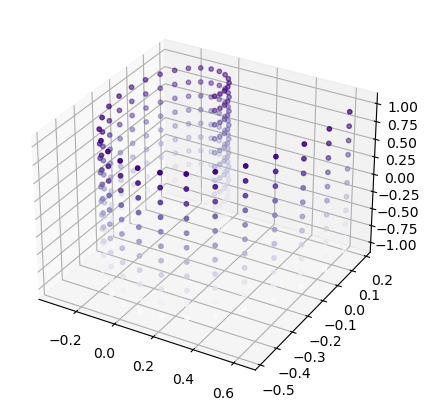

In [54]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c=z, cmap="Purples", marker='o', s=10)
plt.show()

### a) Apply kernel PCA for a dimensionality of $m=2$ with different Gaussian kernel parameters and plot the results.

In [55]:
KERNELS = ["linear", "sigmoid", "poly", "rbf"]

In [60]:
from sklearn.decomposition import PCA, KernelPCA

def apply_KPCA():
    for k in KERNELS:
        kpca = KernelPCA(kernel=k, n_components=2)
        X_kpca = kpca.fit_transform(np.vstack((x, y, z)).T)

        plt.figure(figsize=(12, 5))
        plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=z, cmap="Purples", marker="o", s=10)
        plt.title(f"Kernel PCA with {k} Kernel")

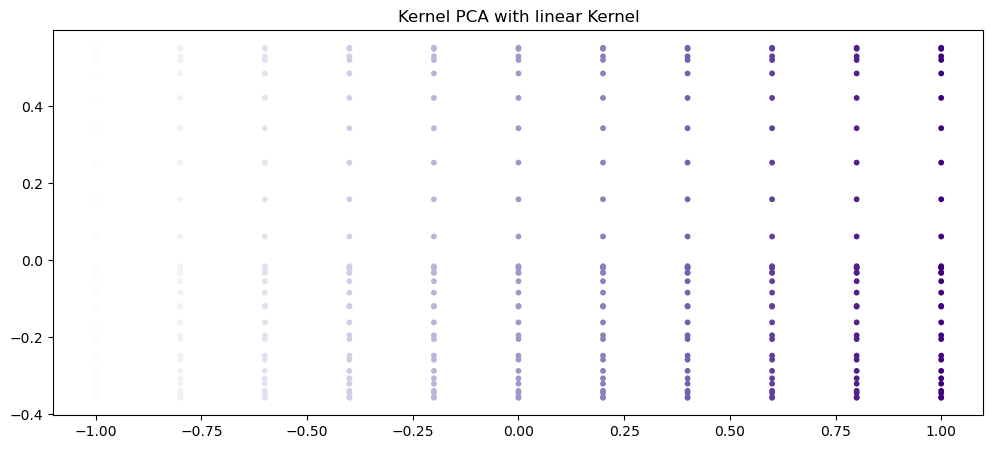

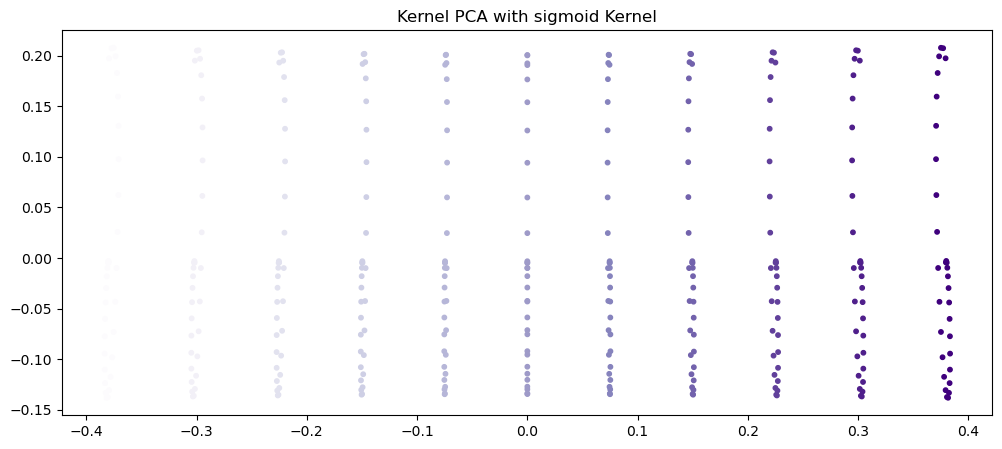

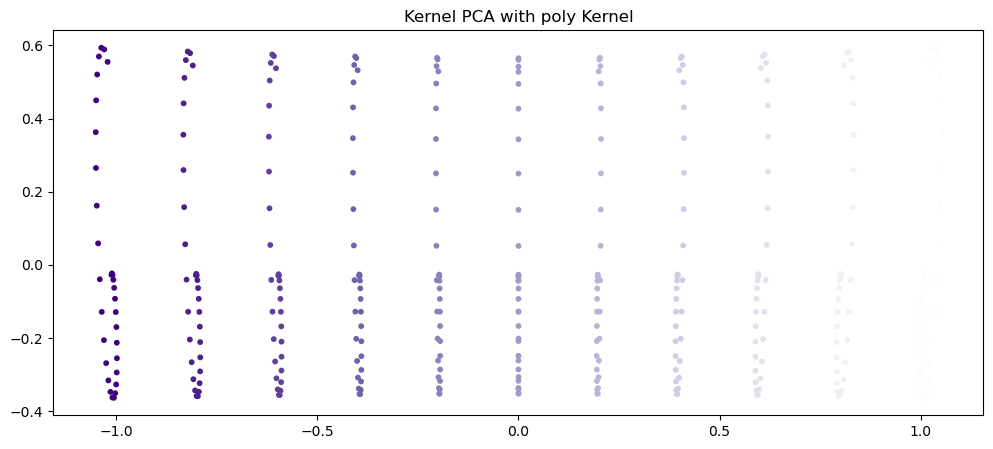

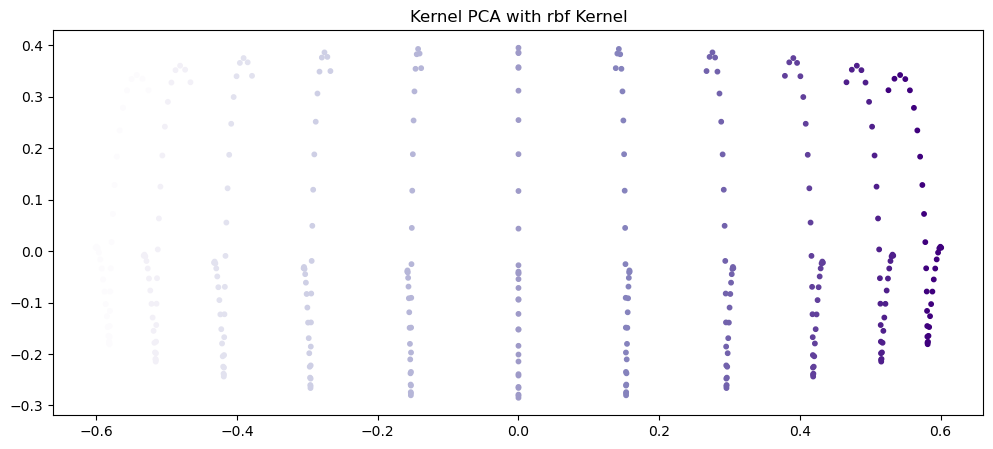

In [61]:
apply_KPCA()

### b) Repeat the process with PCA for the two principal compenents.

In [62]:
def apply_PCA():
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(np.vstack((x, y, z)).T)
    plt.figure(figsize=(12, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=z, cmap="Purples", marker='o', s=10)
    plt.title("PCA without Kernel")
    plt.show()

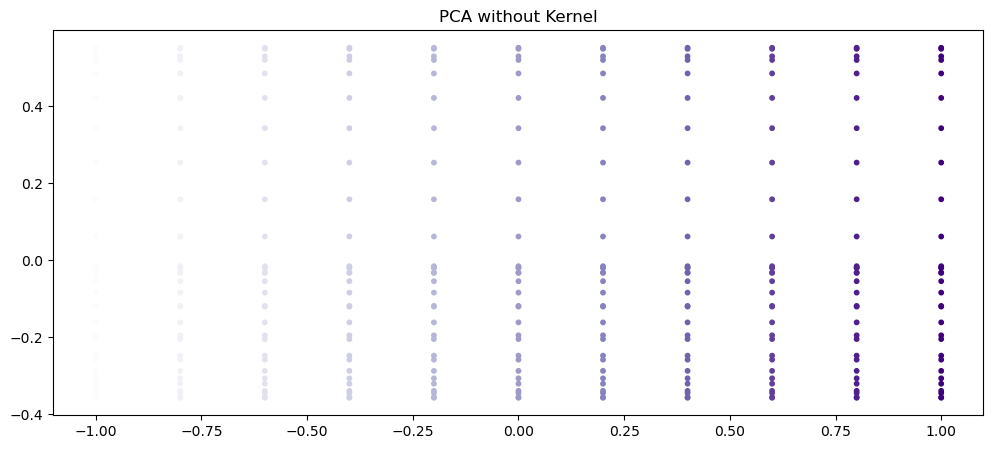

In [63]:
apply_PCA()

### c) Compare and comment on the results.

The result shows that use the Kernel PCA with the follow kernels: `rbf`, `poly`, and `sigmoid` we got the same distribution of the original distribution generated. In other hand, using the Kernel PCA with `linear` kernel and Traditional PCA we got a distribution different from the others.